<a href="https://colab.research.google.com/github/kio15978/machine-learning/blob/main/02_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



# **unit.02 데이터 다루기**

# **머신러닝 알고리즘**

**지도 학습 vs 비지도 학습**



***지도학습*** : 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습

  훈련하기 위한 데이터와 정답 필요

데이터 = 입력, 정답 = 타깃, 이 둘을 합쳐 훈련데이터

***비지도학습*** : 타킷 없이 입력 데이터만 사용

-> 정답을 사용하지 않으므로 무언가 맞힐 수 없음

  대신 데이터를 잘 파악하거나 변형할 수 있음

\

---



# **2-1. 훈련세트와 테스트 세트**

평가에 사용하는 데이터 = 테스트 세트,  훈련에 사용되는 데이터 = 훈련 세트

훈련에 사용한 데이터로 모델을 평가하는 것 적절하지 않음

훈련할 때 사용하지 않은 데이터로 평가해야 함

이를 위해 훈련 데이터에서 일부를 떼어 내어 테스트 세트로 사용

## **도미와 빙어의 데이터 합친 파이썬 리스트**

In [79]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## **두 파이썬 리스트를 순회하여 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트 만들기**

In [80]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

하나의 생선 데이터 = 샘플

도미(35) + 빙어(14) -> 전체 데이터는 49개 샘플, 사용하는 특성은 길이와 무게 2개

## **사이킷런의 KNeighborsClassifer 클래스 임포트하고 모델 객체 생성**

In [81]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier()

## **데이터의 처음 35개를 훈련 세트, 나머지 14개를 테스트 세트로 사용**

인덱스 : 배열의 위치

슬라이싱 : 콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소 선택

 마지막 인덱스의 원소는 포함되지 않는다 [ 시작 : 마지막 +1 ]


 처음부터 시작 [ : n ] 마지막까지 [ n : ]  생략 가능



In [82]:
# 훈련 세트 입력값  0~34  (처음 35개)
train_input = fish_data[ :35]
# 훈련 세트 타깃값  0~34
train_target = fish_target[ :35]

# 테스트 세트 입력값  35~마지막  (나머지 14개)
test_input = fish_data[35: ]
# 테스트 세트 타깃값  35~마지막
test_target = fish_target[35: ]

인덱스 0~34까지 처음 35개 샘플 - 훈련 세트

인덱스 35~78까지 나머지 14개 샘플 - 테스트 세트

## **훈련 세트로 fit( ) 메서드 호출 모델 훈련**

## **테스트 세트로 score( ) 메서드 호출 모델 평가**

In [83]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

fish_data에는 처음부터 순서대로 35개의 도미와 14개의 빙어 샘플이 들어가 있음

따라서 마지막 14개를 테스트 세트로 만들면 빙어 데이터만 들어가게 됨



훈련 세트에 도미만 있어서 테스트 세트가 무엇이든 무조건 도미로 분류

그런데 테스트 세트는 빙어만 있음

=> 정확도 0 % 

# **샘플링 편향**

훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우친 경우

-> 훈련 세트, 테스트 세트 나누기 전에 데이터를 섞든지, 골고루 샘플을 뽑아서 훈련 세트, 테스트 세트 만들어야 함



## **넘파이 numpy**
고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구 <- 제공 데이터를 섞거나 뽑는 것을 간편히 처리가능

1차원 배열 - 선,  2차원 배열 - 면,  3차원 배열 - 공간

보통의 xy 좌표계와 달리 시작점이 왼쪽 위에서부터 시작

## **넘파이 라이브러리 임포트**

In [84]:
import numpy as np

## **파이썬 리스트를 넘파이 배열로 바꾸기**

* 넘파이 array( ) 함수 : 파이썬 리스트를 넘파이 배열로 바꾸기

In [85]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [86]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


## **배열 크기 확인**

* shape 배열의 크기 알려줌 (샘플 수, 특성 수)

In [87]:
print(input_arr.shape)

(49, 2)


(49, 2) => 샘플 49개, 특성 2개

## **배열에서 랜덤하게 샘플 선택해 훈련 세트와 테스트 세트 만들기**
주의 ) input_arr와 target_arr에서 같은 위치는 함께 선택되어야 함

 -> 인덱스를 섞은 다음 input_arr, target_arr 샘플 선택 -> 무작위



* 넘파이 arange( ) 함수 : 시작에서 끝까지 step 크기만큼 일정하게 떨어진 숫자들을 array 형태로 반환

 np.arange(시작점(생략 시 0), 끝점(미포함), step size(생략 시 1)) 
* shuffle( ) 함수 : 주어진 배열을 무작위로 섞음


In [88]:
np.random.seed(42)  # 일정한 결과 얻으려면 초기에 랜덤시드 지정
index = np.arange(49)
np.random.shuffle(index)
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### **앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr 전달하여 랜덤하게 35개 샘플을 훈련 세트로 만들기**

In [89]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

## **나머지 14개를 테스트 세트로 만들기**

In [90]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [91]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


## **산점도 확인**

TypeError: ignored

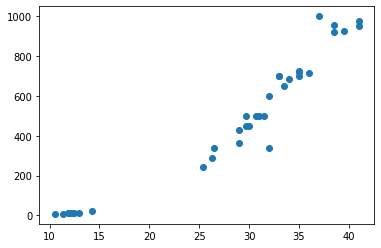

In [92]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## **K-최근접 이웃 모델 훈련**

In [ ]:
kn = kn.fit(train_input, train_target)

In [ ]:
kn.score(test_input, test_target)

## **모델 테스트**

In [ ]:
kn.score(test_input, test_target)

In [ ]:
kn.predict(test_input)

In [ ]:
test_target



---



# **02-2. 데이터 전처리**

실전에 투입 > 길이가 25cm, 무게가 150g이면 도미인데 빙어라고 예측 --> 뭐가 잘못된 걸까?

넘파이로 데이터 준비하기

In [93]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

for문, zip() 이용 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내

생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성

-> 넘파이 통해 간단하게 가능!

## **넘파이 라이브러리 임포트**

In [94]:
import numpy as np

## **전달받은 리스트 일렬로 세운 다음 차례대로 연결**

* column_stack( ) : 전달받은 리스트 일렬로 세운 다음 차례대로 나란히 연결

 연결할 리스트는 파이썬 튜플로 전달

* 파이썬 튜플은 리스트와 매우 비슷. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없다.

튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다 ~> 매개변수 값으로 많이 사용

In [95]:
fish_data = np.column_stack((fish_length, fish_weight))

In [96]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


넘파이 배열을 출력하면 리스트처럼 한 줄로 길게 출력 x

행과 열을 맞추어 가지런히 정리된 모습으로 보여줌

## **타깃 데이터 만들기**

원소가 하나인 리스트 [1], [0]을 여러 번 곱해서 타깃 데이터 만듦

-> 넘파이 np.ones( ), np.zeros( ) 함수 이용!



* np.ones( ), np.zeros( ) : 각각 원하는 개수의 1과 0을 채운 배열을 만들어줌

예) print(np.ones(5))  => [1,1,1,1,1]

### **두 배열을 그대로 연결**

np.ones(), np.zeros() 함수 사용해 1이 35개인 배열과 0이 14개인 배열 만들고

np.concatenate() 함수 사용해 배열 연결

* np.concatenate( ) : 첫 번째 차원을 따라 배열을 연결
 연결한 리스트나 배열을 튜플로 전달해야 함 

In [97]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [98]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# **사이킷런으로 훈련세트와 테스트 세트 나누기**
넘파이 배열의 인덱스를 직접 섞어 훈련 세트와 데이터 세트 나눔 ... 번거로움

-> 사이킷런 train_test_split( ) 함수 이용!



* train_test_split( ) : 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어줌

     나누기 전에 알아서 섞음
     사이킷런 model_selection 모듈 아래 있음



## **train_test_split 함수 임포트**

In [99]:
from sklearn.model_selection import train_test_split

사용법 : 나누고 싶은 리스트나 배열을 원하는 만큼 전달

train_test_split() 함수에는 자체적으로 랜덤 시드를 지정할 수 있는 random_state 매개변수 있음



## **fish_data와 fish_target 나누기**

In [100]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

fish_data와 fish_target 2개의 배열을 전달 -> 2개씩 나뉘어 총 4개의 배열 반환

처음 2개는 입력데이터(train_input, test_input) 나머지 2개는 타깃데이터(train_target, test_target)



이 함수는 기본적으로 25%를 테스트 세트로 떼어냄

* shape( ) : 넘파이 배열, 입력 데이터의 크기 출력

## **입력 데이터 크기 출력**

In [101]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


=> (36, 2) (13, 2)
입력데이터는 2개의 열이 있는 2차원 배열﻿



## **타깃 데이터 크기 출력**

In [102]:
print(train_target.shape, test_target.shape)

(36,) (13,)


=> (36,) (13,)

타깃 데이터는 1차원 배열

훈련 데이터와 테스트 데이터를 각가 36개와 13개로 나눔

## **데이터 출력**

In [103]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


=> [1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

13 세트 중에서 10개가 도미(1), 3개가 빙어(3)

원래 도미와 빙어 개수 35개와 14 -> 2.5:1 비율

하지만 이 테스트 세트의 비율은 3.3:1

-> 샘플링 편향

## **클래스 비율에 맞게 데이터 나누기**

훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없음

-> train_test_split( ) 함수의 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔



In [104]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [105]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]



빙어가 하나 늘어 테스트 세트의 비율이 2.25:1이 됨



데이터 준비 완료! 문제 확인!﻿



# **수상한 도미 한 마리**
## **K-최근접 이웃 훈련**

앞서 준비한 데이터로 k-최근접 이웃 훈련

In [106]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

## **모델에 새 도미 데이터 넣고 결과 확인**

길이가 25cm, 무게가 150g 데이터

In [107]:
print(kn.predict([[25,150]]))

[0.]


=> [0]
도미 데이터를 넣었는데 빙어로 예측되었다 ??????

## **산점도 확인**

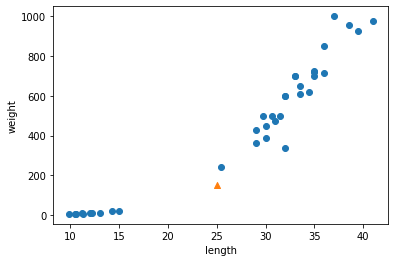

In [108]:
import matplotlib.pyplot as plt 
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

train_input[ : , 0]  모든 행, 열 0번

train_input[ : , 1]  모든 행, 열 1번

k-최근접 이웃은 주변 샘플 중에서 다수인 클래스를 예측으로 사용

* kneighbors( ) : KNeighborsClassifier 클래스 - 주어진 샘플에서 가장 가까운 이웃 찾아주는 메서드

 이웃까지의 거리와 이웃 샘플의 인덱스 반환

* n_neighbors( ) : KNeighborsClassifier 클래스의 이웃 개수, 기본값 5

In [109]:
distances, indexes = kn.kneighbors([[25, 150]])

## **훈련 데이터 중에서 이웃 샘플을 따로 구분해 그리기**

indexes 배열 사용

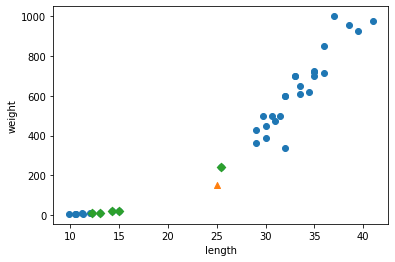

In [110]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 5개의 샘플이 초록 다이아몬드로 표현



## **데이터 확인**


In [111]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [112]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [113]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]

삼각형 샘플에 가장 가까운 첫 번째 샘플까지의 거리 92﻿

그 외 가장 가까운 샘플들은 130, 138



그런데 92와 130 그래프 거리 비율이 이상하다?????

-> x축은 범위가 좁고(10~40), y축은 범위가 넓음(0~1000)

-> y축으로 조금만 멀어져도 거리가 큰 값으로 계산

-> x축 범위를 동일하게 0~1000으로 맞추자





## **x축 범위를 동일하게 맞추자**

* xlim( ) : x축 범위 지정

* ylim( ) : y축 범위 지정



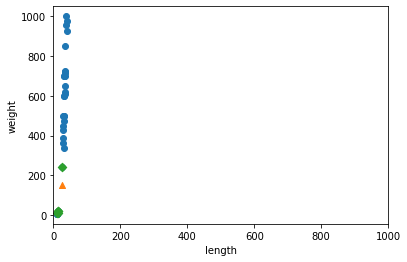

In [114]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축과 y축 범위 동일하게 맞추었더니 모든 데이터가 수직으로 늘어선 형태

-> 생선 길이(x축)는 큰 영향 미치지 못 함, 생선 무게(y축)만 고려 대상



두 특성(길이와 무게)의 값이 놓인 범위가 매우 다름

이를 두 특성의 스케일이 다르다고 함



데이터를 표현하는 기준이 다르면 알고리즘 올바르게 예측 불가 (특히 거리 기반일 때)

제대로 사용하려면 특성값을 일정한 기준으로 맞춰야 함

## **데이터 전처리**
특성값을 일정한 기준으로 맞추는 작업



### **표준점수**

각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄

이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능



* 분산 : 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸다

* 표준편차 : 분산의 제곱근으로 데이터가 분산된 정도

   각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타냄
   
계산법 : 편균을 빼고 표준편차 나누기

In [115]:
mean= np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

np.mean( ) : 평균

np.std( ) : 표준편차

train_input : 크기의 배열

aixs : 중심 축

 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 계산해야 함

 axis=0 : 행을 따라 각 열의 통계 값 계산



## **계산된 평균, 표준편차 출력**

In [116]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


각 특성마다 평균, 표준편차 구해짐

## **표준점수 반환**

원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수로 반환

In [117]:
train_scaled = (train_input - mean) / std

train_input의 모든 행에서 mean에 있는 두 평균값을 뺴줌

그 다음 std에 있는 두 표준편차를 다시 모든 행에 적용

# **전처리 데이터로 모델 훈련하기**
## 표준점수로 변환한 데이터와 샘플 산점도

표준점수로 변환한 train_sacled와 20,150 샘플로 산점도﻿

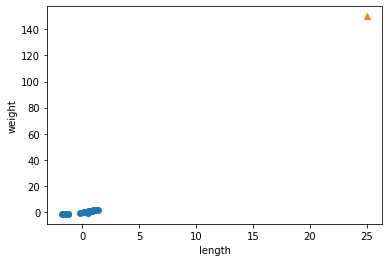

In [118]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

오른쪽 맨 꼭대기에 샘플 하나만 덩그러니?????

-> 훈련 세트를 mean으로 빼고 std로 나누어 주었기 때문에 값의 범위 달라짐


## **샘플도 훈련 세트 mean, std 이용 변환**
샘플 [25,150]을 동일한 비율로 변환

중요!!  ★ 훈련 세트의 mean, std를 이용하여 변환해야 함 ★

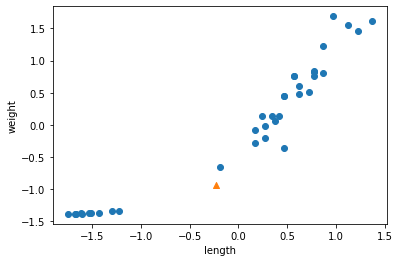

In [120]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

표준편차로 변환하기 전의 산점도와 거의 동일

달라진 점  : x, y축의 범위가 -1.5 ~ 1.5 사이로 바뀜

훈련데이터의 두 특성이 비슷한 범위를 차지

## **변환한 데이터셋으로 다시 훈련**

In [121]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

## **테스트 세트도 훈련 세트 기준으로 변환**

주의 ) 훈련 후 테스트 세트를 평가할 때는

훈련 세트의 기준으로 테스트 세트를 변환해야 같은 스케일로 산점도를 그릴 수 있다

In [122]:
test_scaled = (test_input - mean) / std

## **모델 평가**

In [123]:
kn.score(test_scaled, test_target)

1.0

## **모델 예측**

In [124]:
print(kn.predict([new]))

[1.]


=> [1.]
드디어 도미로 예측

## **kneighbors( ) 함수로 샘플 k-최근접 이웃 구한 다음 산점도**
특성을 표준점수로 바꾸었기 때문에 k-최근접 이웃 알고리즘이 올바르게 거리 측정

가장 가까운 이웃에 변화!

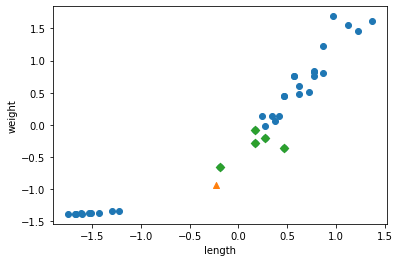

In [125]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

삼각형 샘플에 가장 가까운 샘플 모두 도미!

특성값의 스케일에 민감하지 않고 안정적인 예측 가능!



---

